In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
mnist.train.shape

AttributeError: 'DataSet' object has no attribute 'shape'

In [29]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

#每一個批次的大小
batch_size = 80 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 

#建立一個神經網路

#隱藏層
W1 = tf.Variable(tf.truncated_normal([784, 800], stddev=0.1))
b1 = tf.Variable(tf.zeros([800]))
L1 = tf.nn.tanh(tf.matmul(x, W1) + b1)

#輸出層
W2 = tf.Variable(tf.truncated_normal([800, 10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10]))
prediction = tf.nn.tanh(tf.matmul(L1, W2) + b2)

#代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction)) #交叉商代價函數

#Gradient desent method 
gd = tf.train.AdagradOptimizer(0.2)
#gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(5): 
       
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys} 
            sess.run(train, feed_dict)
        #計算一次準確率
        train_feed_dict = {x: mnist.train.images, y: mnist.train.labels} #train data feed dictionary
        train_acc = sess.run(accuracy, train_feed_dict)
        test_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        test_acc = sess.run(accuracy, test_feed_dict)          
        print("Iter=" + str(epoch) + ", Training Accuracy=" + str(train_acc) + ", Testing Accuracy=" + str(test_acc))


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter=0, Training Accuracy=0.9216909, Testing Accuracy=0.9205
Iter=1, Training Accuracy=0.94461817, Testing Accuracy=0.9417
Iter=2, Training Accuracy=0.9566727, Testing Accuracy=0.9539
Iter=3, Training Accuracy=0.96385455, Testing Accuracy=0.9597
Iter=4, Training Accuracy=0.9719818, Testing Accuracy=0.9651


In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

#每一個批次的大小
batch_size = 80 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


## 防止过拟合  
* 
### 增加数据集  
* 
### 正则化方法  
$$C = C_{0} + \frac{\lambda} {2n} \sum_{\omega}\omega^2 $$


* 
### Dropout
在訓練神經網路的時候，對於不一樣的訓練樣本，遮蔽隱藏層的一些神經元，可以減低 overfitting 的可能  
以下是一個沒有 Dropout的例子 (keep_prob = 1.0)， Training Accuracy 比 Test Accuracy 準確許多  
也就是說，這個神經網路已經 Overfitting

In [17]:
#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 
keep_prob = tf.placeholder(tf.float32) #用來 dropout 的機率

#建立一個神經網路

#隱藏層
W1 = tf.Variable(tf.truncated_normal([784, 800], stddev=0.1))
b1 = tf.Variable(tf.zeros([800])+0.1)
L1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
L1_dropout = tf.nn.dropout(L1, keep_prob)

#輸出層
W2 = tf.Variable(tf.truncated_normal([800, 10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10])+0.1)
prediction = tf.nn.tanh(tf.matmul(L1_dropout, W2) + b2)

## 常见激活函数  

每个神经元都必须有激活函数。它们为神经元提供了模拟复杂非线性数据集所必需的非线性特性。该函数取所有输入的加权和，进而生成一个输出信号。你可以把它看作输入和输出之间的转换。使用适当的激活函数，可以将输出值限定在一个定义的范围内。

$$ Y_{hat} = g( \sum_{j=1}^{N} W_j x_j + b  )  $$


* 
## sigmoid激活函数
tf.nn.sigmoid()  
$$ S(x) = \frac{1}{1 + e^{-x}}$$
$$ S'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = S(x)(1-S(x)) $$
sigmoid激活函数的优点：输出的映射区间(0,1)内单调连续，非常适合用作输出层，并且比较容易求导。  
sigmoid激活函数的缺点：它具有软饱和性，即当输入x趋向于无穷的时候，它的导数会趋于0，导致很容易产生梯度消失。  

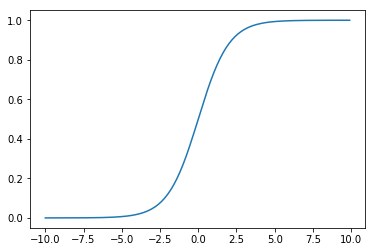

In [30]:
x = tf.constant(np.arange(-10, 10, 0.1),dtype=tf.float32)
sess = tf.Session()
y = sess.run(tf.sigmoid(x))
# print(y)
plt.plot(np.arange(-10, 10, 0.1), y)
plt.show()


* 
## tanh激活函数
tf.nn.tanh()
$$ tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$
tanh是双曲正切函数，它将整个实数区间映射到了(-1,1)，tanh函数也具有软饱和性。它的输出是以0为中心，tanh的收敛速度比sigmoid要快，由于存在软饱和性，所以tanh也存在梯度消失的问题。  


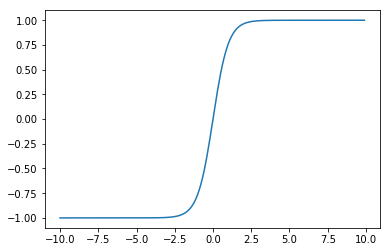

In [31]:
x = tf.constant(np.arange(-10, 10, 0.1),dtype=tf.float32)
sess = tf.Session()
y = sess.run(tf.tanh(x))
# print(y)
plt.plot(np.arange(-10, 10, 0.1), y)
plt.show()


* 
## relu激活函数
tf.nn.relu()  
relu激活函数现在是最受欢迎的激活函数，经常被使用在神经网络中。  
relu函数的定义
$$ f(x) = max(x, 0)$$
relu函数在x<0时，输出始终为0。由于x>0时，relu函数的导数为1，所以relu函数能够在x>0时保持梯度不断衰减，从而缓解梯度消失的问题，还能加快收敛速度，还能是神经网络具有稀疏性表达能力，这也是relu激活函数能够被使用在深层神经网络中的原因。由于当x<0时，relu函数的导数为0，导致对应的权重无法更新，这样的神经元被称为"神经元死亡"。
在TensorFlow中还包括了relu函数的扩展函数如：relu6和crelu，除此之外还有leaky relu、PRelu、RRelu等

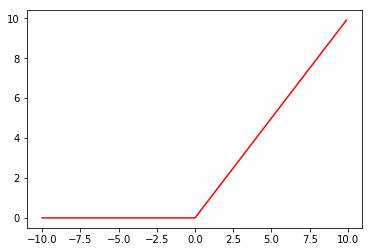

In [45]:
x = tf.constant(np.arange(-10, 10, 0.1),dtype=tf.float32)
sess = tf.Session()
y1 = sess.run(tf.nn.relu(x))
y2 = sess.run(tf.nn.relu6(x))
y3 = sess.run(tf.nn.softplus(x))
y4 = sess.run(tf.nn.leaky_relu(x, alpha=0.2))
plt.plot(np.arange(-10, 10, 0.1), y1, 'r')
# plt.plot(np.arange(-10, 10, 0.1), y2, 'b')
# plt.plot(np.arange(-10, 10, 0.1), y3, 'g')
# plt.plot(np.arange(-10, 10, 0.1), y4, 'y')
plt.show()


* 
## dropout函数
tf.nn.dropout()  
dropout函数会以一个概率为keep_prob来决定神经元是否被抑制。如果被抑制，该神经元输出为0，如果不被抑制则该神经元的输出为输入的1/keep_probbe倍，每个神经元是否会被抑制是相互独立的。神经元是否被抑制还可以通过调节noise_shape来调节，当noise_shape[i] == shape(x)[i]，x中的元素是相互独立的。如果shape(x)=[k,l,m,n](k表示数据的个数，l表示数据的行数，m表示数据的列，n表示通道)，当noise_shape=[k,1,1,n]，表示数据的个数与通道是相互独立的，但是与数据的行和列是有关联的，即要么都为0，要么都为输入的1/keep_prob倍。


In [48]:
x = tf.constant(np.array([np.arange(-5,5)]),dtype=tf.float32)
sess = tf.Session()
x = sess.run(x)
print(x)
#元素之间互不干扰
y = sess.run(tf.nn.dropout(x,keep_prob=0.5))
print(y)
#元素之间互不干扰
y = sess.run(tf.nn.dropout(x,keep_prob=0.5,noise_shape=[1,10]))
print(y)
#元素之间存在关联
y = sess.run(tf.nn.dropout(x,keep_prob=0.5,noise_shape=[1]))
print(y)


[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]]
[[-0. -8. -6. -0. -0.  0.  0.  4.  6.  8.]]
[[-0. -0. -6. -4. -2.  0.  2.  4.  6.  8.]]
[[-0. -0. -0. -0. -0.  0.  0.  0.  0.  0.]]


*  
阈值激活函数用于 McCulloch Pitts 神经元和原始的感知机。这是不可微的，在 x=0 时是不连续的。因此，使用这个激活函数来进行基于梯度下降或其变体的训练是不可能的。
*  
Sigmoid 激活函数一度很受欢迎，从曲线来看，它像一个连续版的阈值激活函数。它受到梯度消失问题的困扰，即函数的梯度在两个边缘附近变为零。这使得训练和优化变得困难。
*  
双曲正切激活函数在形状上也是 S 形并具有非线性特性。该函数以 0 为中心，与 Sigmoid 函数相比具有更陡峭的导数。与 Sigmoid 函数一样，它也受到梯度消失问题的影响。
*  
线性激活函数是线性的。该函数是双边都趋于无穷的 [-inf，inf]。它的线性是主要问题。线性函数之和是线性函数，线性函数的线性函数也是线性函数。因此，使用这个函数，不能表示复杂数据集中存在的非线性。
*  
ReLU 激活函数是线性激活功能的整流版本，这种整流功能允许其用于多层时捕获非线性。
* 
使用 ReLU 的主要优点之一是导致稀疏激活。在任何时刻，所有神经元的负的输入值都不会激活神经元。就计算量来说，这使得网络在计算方面更轻便。
* 
ReLU 神经元存在死亡 ReLU 的问题，也就是说，那些没有激活的神经元的梯度为零，因此将无法进行任何训练，并停留在死亡状态。尽管存在这个问题，但 ReLU 仍是隐藏层最常用的激活函数之一。
* 
Softmax 激活函数被广泛用作输出层的激活函数，该函数的范围是 [0，1]。在多类分类问题中，它被用来表示一个类的概率。所有单位输出和总是 1。

### 二次代价函數  

$$C = - \frac{1} {2n} \sum_{x} ||y(x) - a(x)||^ 2 $$


### 交叉熵loss 函數 (cross entropy loss function)
對於 softmax 激活函數的交叉商如下:
$$J(\theta ) = - \frac{1} {m} \sum_{i=1}^{m} y^{(i)} \log(h_{\theta} (x^{(i)})) + (1 - y^{(i)}) \log (1 - h_{\theta} (x^{(i)})) $$
對於 softmax 等函數(S型曲線函數)，使用交叉商loss函數，可以收斂得更快!

In [9]:
#代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction)) #交叉商代價函數

In [10]:
#Gradient desent method 
gd = tf.train.AdagradOptimizer(0.2)
#gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

In [12]:
#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31): 
       
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 0.9} 
            sess.run(train, feed_dict)
        #計算一次準確率
        train_feed_dict = {x: mnist.train.images, y: mnist.train.labels, keep_prob: 1.0} #train data feed dictionary
        train_acc = sess.run(accuracy, train_feed_dict)
        test_feed_dict = {x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0} #testing data feed dictionary
        test_acc = sess.run(accuracy, test_feed_dict)          
        print("Iter=" + str(epoch) + ", Training Accuracy=" + str(train_acc) + ", Testing Accuracy=" + str(test_acc))

Iter=0, Training Accuracy=0.91825455, Testing Accuracy=0.9203
Iter=1, Training Accuracy=0.9405636, Testing Accuracy=0.9411
Iter=2, Training Accuracy=0.94732726, Testing Accuracy=0.9459
Iter=3, Training Accuracy=0.95903635, Testing Accuracy=0.9577
Iter=4, Training Accuracy=0.96654546, Testing Accuracy=0.9639
Iter=5, Training Accuracy=0.96943635, Testing Accuracy=0.9652
Iter=6, Training Accuracy=0.9715273, Testing Accuracy=0.9658
Iter=7, Training Accuracy=0.9756909, Testing Accuracy=0.9693
Iter=8, Training Accuracy=0.97712725, Testing Accuracy=0.9705
Iter=9, Training Accuracy=0.9790909, Testing Accuracy=0.9708
Iter=10, Training Accuracy=0.98025453, Testing Accuracy=0.9725
Iter=11, Training Accuracy=0.9807091, Testing Accuracy=0.9719
Iter=12, Training Accuracy=0.98112726, Testing Accuracy=0.9724
Iter=13, Training Accuracy=0.9842, Testing Accuracy=0.9743
Iter=14, Training Accuracy=0.9844364, Testing Accuracy=0.9743
Iter=15, Training Accuracy=0.9849273, Testing Accuracy=0.9745
Iter=16, Trai

### tensorboard: 可视化神经网络的工具

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

#每一個批次的大小
batch_size = 80 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

with tf.name_scope('input'):
    #定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
    x = tf.placeholder(tf.float32, [None, 784]) 
    y = tf.placeholder(tf.float32, [None, 10]) 

#建立一個神經網路

with tf.name_scope('Inference'):
    #隱藏層
    W1 = tf.Variable(tf.truncated_normal([784, 800], stddev=0.1))
    b1 = tf.Variable(tf.zeros([800]))
    L1 = tf.nn.tanh(tf.matmul(x, W1) + b1)

    #輸出層
    W2 = tf.Variable(tf.truncated_normal([800, 10], stddev=0.1))
    b2 = tf.Variable(tf.zeros([10]))
    prediction = tf.nn.tanh(tf.matmul(L1, W2) + b2)

with tf.name_scope('loss'):
    #代價函數 : loss = mean((y - prediction)^2)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction)) #交叉商代價函數

    #Gradient desent method 
    gd = tf.train.AdagradOptimizer(0.2)
    #gd = tf.train.GradientDescentOptimizer(0.2)

    #最小化 代價函數 (operator)
    train = gd.minimize(loss)

with tf.name_scope('Accuracy'):
    #結果存在一個 boolean 的變數中
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置
    #求準確率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#初始化變數 operator
init = tf.global_variables_initializer()    

#開始training
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs/', sess.graph) #第一個參數是路徑(在當前的路徑下建立資料夾 logs)，存入的東西是 graph (圖)
    
    for epoch in range(31): 
       
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys} 
            sess.run(train, feed_dict)
        #計算一次準確率
        train_feed_dict = {x: mnist.train.images, y: mnist.train.labels} #train data feed dictionary
        train_acc = sess.run(accuracy, train_feed_dict)
        test_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        test_acc = sess.run(accuracy, test_feed_dict)          
        print("Iter=" + str(epoch) + ", Training Accuracy=" + str(train_acc) + ", Testing Accuracy=" + str(test_acc))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Iter=0, Training Accuracy=0.92865455, Testing Accuracy=0.9269
Iter=1, Training Accuracy=0.94845456, Testing Ac

在当前目录下打开cmd  
输入 tensorboard --logdir=/logs/  
打开浏览器提示 No dashboards are active for the current data set.  
输入 tensorboard --logdir=.\logs  
打开浏览器 http://localhost:6006/